# Decision Tree Classifiers: 3 Tutorials
**Notebook 1 of 3**

In this tutorial we will look at how the Decision Tree algorithm works to make predictions. There are three notebooks in this tutorial, each notebook explores a different application for the Decision Tree and related Random Forest algorythm. A Random Forest is a collection of Decision Trees.

* Notebook 1 Decision Trees
* Notebook 2 Random Forest
* Notebook 3 Random Forest + Noisy Datasets


**Notebook 1 Decision Trees** will look at data about the Iris flower, a genus of about 300 species of plants in the family Iridaceae, that is very polpular in gardens accross global temperature zones. These are many species of plants that would take a long time to manually identify, so we want to create a model that can help us predict which class of iris the flower belongs to, based on its features.

To be able to do this prediction, we need data on the various classes of the Iris flower, and its key features. Fortunately, there are a lot of datasets for this purpose. We will access Open Data sources and verify the data for structure and consistency.

We will use simple Machine Learning models known as Decision Trees which can make predictions of output data based on previously unseen input data.  They work by splitting the data into groups like splitting a population based on hair colour, then favourite food, then favourite subject and so on creating a tree structure with multiple branches.  When new input data is passed to the model, the decision tree places it in the right group to predict an outcome.  

Notebook 2 will extend the Decision Tree model to the Random Forest model, which is a collection of multiple decision trees on different chunks of data. The model aggregates the results of the trees in order to produce more accurate predictions and the output of the random forest is the class selected by the highest number of decision trees in the random forest.

But where do we get our data? The University of California Irvine's Machine Learning Repository has small Open Data sets suitable to get our training data and test data. We have already downloaded the datasets and you can find them in the tutorial repository.

# Learning objectives
Average time to complete 30min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning.
* Combine data sets.
* Remove outliers and unneeded data.
* Filling in the missing data, if needed.
* Visualize and analyze data to gain insights into the data integrity.
* Make the Decision Tree classifier.
* Make prediction with the Decision Tree classifier.
* Visualize how clearly the Decision Tree model distinguishes the Iris classes using decision boundaries.


## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package. Scikit-learn provides simple and efficient tools for data mining and analysis.
* numpy. Numpy provides support for large, multi-dimentional arrays and matrices.
* seaborn. Provides an intuitive and attractive interface for creating informative and visually appealing statistical graphics.
* matplotlib. Allows the generation of plots and charts.
* requests. Handles Http requests and responses when downloading datasets or pre-trained models.
* ipywidgets. Allows the creation of interactive plota, graphs and other visualizations, as well as control the execution of code.
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the Digital Research Alliance of Canada. In the first tutorial we encouraged you to resepct two RDM best practices:

* SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
* BACKUP YOUR DATA (3-2-1 rule)<br>

These practices should apply in this tutorial as well, but we will also look at best practices of data description, documentation and file naming that will streamline your data processing and project management. 

DESCRIBE YOUR DATA

* Machine Friendly: Describe your dataset with a metadata standard for discovery.
* Human Friendly: Describe your variables, so your colleagues will understand what you meant. Data without good metadata is useless. Give your variables clear names.
* Do not leave cells blank -use numeric values clearly out of range to define missing (e.g. '99999') or not applicable (e.g. '88888') data anddescribe these in your data dictionary.
* Convert your data to open, non-proprietary formats 
* Name your files well with basic meta-data in the file names


## Cleaning your data

As in the first Data Preparation for Machine Learning Tutorial, we will use Pandas library for our data cleaning since it has veryful power filtering and manipulation tools to get our data formatted to allow for easy analysis. When you use data from other sources the data cleaning process can be time consuming, but it is an important step to ensure that your results are accurate. 

In [1]:
# Depending where you are running the code, you may need to install the libraries.
# You can check if the libraries are installed by running !pip list in a cell.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [2]:
# These Python libraries need to be installed and imported in the environment
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

We will work with data about the Iris flower. We want to predict which species an Iris flower belongs to by inputting measurements of the **sepal** and **petal.** For a machine learning algorithm, the **species** will represent the class that the data belongs.

To be able to do this, we need data from various species of the iris flowers and key measurements that we believe to be unique to them. Fortunately, there are a lot of datasets for this purpose. The University of California Irvine's [Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris) has small data sets suitable to get our training data and test data. 

#### Iris data

The very first step in data cleaning, is reading the data! Make sure you have "data/MLTS_20240530_DTRF_Data_iris_flower_feature_measurements_1.0.csv" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below.

In [3]:
# https://archive.ics.uci.edu/dataset/53/iris
# load the url
url = '../data/MLTS_20240530_DTRF_Data_iris_flower_feature_measurements_1.0.csv'
dataset = pd.read_csv(url)

Let's take a first hand look at the dataset to make sure the data can be use within our notebook. 

The following pictures show the parts of the Iris species that were measured.


![iris](../MLTS_20240530_DTRF_Graphics_IrisSpecies_1.0.jpg)

The data has now been read by Pandas and stored in the variable dataset so we can now use it in our notebook.
Let's see that we have!

In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This data set follows RDM best practices because the variables of each column are clearly named: The **sepal** and the **petal** are two distinct parts to the Iris flower. In this data set structure, sepal length and width are easily understood by a human who has adequate horticultural knowledge to be distinct from the petal length and width, and that all of these data points are necessary to classify the flower as a **species** of the Iridecae family. Therefore, even if we didn't collect this data ourselves by measuring hundreds of Iris flowers, you can still reuse it with ease.

Since we only want to get a cursory look at the data at this stage, an alternated way to present the data is to just look at the first five rows of data

In [5]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's take a further look.

In [6]:
# Data types in the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The column names are easily understandable and follow good RDM best practices to describe your variables and values and to document them. The clear documentation of the variables on the UCI Machine Learning Repository explains the data collection process, all of this careful work by someone else, helps us to reuse this data!

The summary on the UCI Machine Learning Repository explains that these columns represent measurements of the Iris flowers that the data was collected from using the following values:  

*Non-null* values are the number of flowers that were measured and classified by their species.<br>
*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>
*object* values indicate that the variable contains categorical or textual data rather than numerical.<br>

Notice that we have 150 entries (one for each iris flower), and if we look at the measurements, we see we have 150 non-null values. *This indicates no missing data!*. We also notice that the datatypes for the measurements are all numerical and the same datatype (float64).  This is important since performing math functions can only work with numerical data. Species is a textual value, which is what we expect.

Fortunately, we don't have to deal with missing data here.  Visualization is a powerful tool to check the data because it lets you see at a glance if there are issues with data integrity that will impact the accuracy of the prediction model.

This requires some level of understanding of the data you are working with. For complicated datasets, visualizations can be quite difficult and would require some domain expertise to interpret them, but it pays off to visualize because of the insights that it can bring before building the Machine Learning model.

In this case, we are measuring petal and sepal lengths and widths, so no expertise required in this case! Let's plot some of the data.


In [7]:
# numerical summary, only applies to numerical columns
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Next, let's analyze the data. 
Pandas has a lot of useful functions useful for **data exploration**.  The .describe() function generates descriptive statistics of a DataFrame or a Series of numeric values.  This function generates summary statistics for numeric columns, including count, mand, stadard deviation, minimum, 35th percentile, 50th percentile (median), 75th percentile, and maximum. It is useful because it helps identify anomailies in the data.

Machine Learning models work best when data is evenly distributed as on a Normal Bell curve.  That's an idealized representation of phenomena in the world.  We want an idea as to how "uneven" the data is, or  how much it deviates from that ideal Bell curve shape because it will impact the accuracy of the prediction model.   

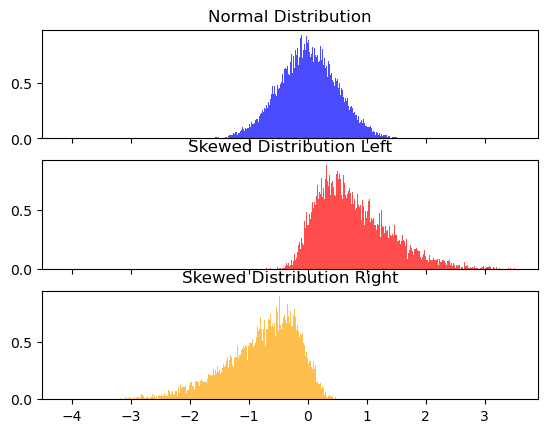

In [8]:
mu, sigma = 0, 0.5
normal_dist = np.random.normal(mu, sigma, 20000)
skewness_left = 5
skewness_right = -5
skewed_dist_left = stats.skewnorm.rvs(a=skewness_left, size=10000)
skewed_dist_right = stats.skewnorm.rvs(a=skewness_right, size=10000)

# Create subplots
fig, axs = plt.subplots(3, sharex=True)

# Plot normal distribution
axs[0].hist(normal_dist, bins=300, density=True, color='b', alpha=0.7)
axs[0].set_title('Normal Distribution')

# Plot skewed distribution
axs[1].hist(skewed_dist_left, bins=300, density=True, color='r', alpha=0.7)
axs[1].set_title('Skewed Distribution Left')

# Plot skewed distribution
axs[2].hist(skewed_dist_right, bins=300, density=True, color='orange', alpha=0.7)
axs[2].set_title('Skewed Distribution Right')

plt.show()

To illustrate this point, consider the three distributions above or a variable taking on random values.  For a given variable, the normal curve is more fair when it comes to it's spread across all possible values.  However, the skewed distribution given much more preference or weight to a narrow band of values which will affect the outcome.

We know that the iris dataset is small (150 data points).  Using the mean is a always good metric to start with to evaluate if the decisions made by the model are reliable.  When we get into larger datasets (1,000s, 100,000s points), you will want to look at the distribution metrics. 

Based on the mean, we observe that there are no extreme outliers that could indicate the dataset deviating greatly from a Normal distribution.

In [9]:
# number of instances in each class
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

We want to look for at how the data associated with three classes of iris is distributed.  Any class with more data than others, for example, would carry more "weight" and potentially infleunce the outcome of the decision tree classifer.

We looked at the numerical distribution and saw that there are no anomalies to note. Let's look at how the textual distribution is split in the dataset.  We know that there are 3 species of Iris: setosa, versocolor and virginica.  Let's see how many rows for each one we have.

Our 150 rows dataset is divided in 50, 50 and 50 split among species so that tells us that all the data is evenly divided with regards to the species.

In [10]:
# Break out out a traing and a test set
train, test = train_test_split(dataset, test_size = 0.3, stratify = dataset['species'], random_state = 42)

Now we build the Decision Tree classifier. The train_test_split function allows you to break out your data in a training set and a test set.  This function randomly splits the dataset into a training portion and a test portion.  The training portion is what we use to train the classifer on.  The test portion is what we use to validate the classifier once it is trained. Commonly, a good place to start is with 70%/30% split in this case.

In [11]:
# number of instances in each class in training data
train.groupby('species').size()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


Let's see what we've got in the training set.

Taking a look at the training set reveals the 105 entries that represents 70% of the total. The training data is made up of the 4 numerical measurements (petal, sepal length and width) and 1 text value representing the species.  The integrity of the data we will train on seems to have been maintained. Maintaining the integrity of the data when we manipulated it is crucial for ensuring its reliability and usability for analysis and decision-making.  Specifically, here we are looking for:<br><br>
Completeness with no missing or omitted values or records<br>
Consistency in data types and quantity<br>
Immutability ensuring nothing was altered through the code<br>

Let's take a look at the histograms to get more insight into the training set.

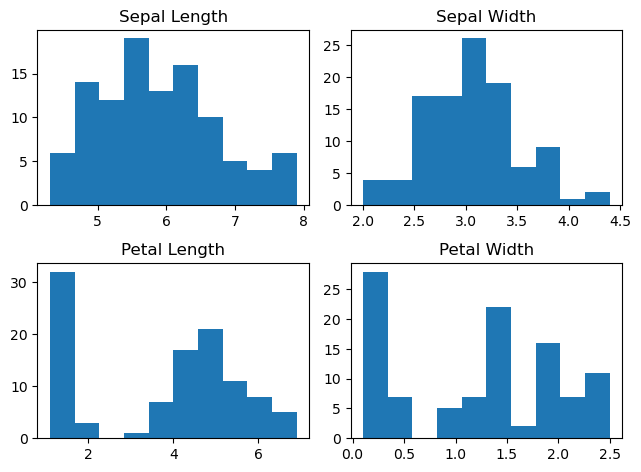

In [12]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

#Comment: Why do we need to add some spacing between plots. Please explain.

# add some spacing between subplots
fig.tight_layout(pad=1.0);

In a clean dataset, its the data with most discontinuity and disparity that tend to become higher deciding factors in classifiers. 

If you look at the data in the graphs above, you can see that the sepal length and the sepal width are almost a perfect Normal distribution (the shape of a curve). The petal length and width however aren't normally distributed along a curve. That's a sign that the petal's measured properties will likely be a deciding factor about what species (class) an Iris flower belongs to.  

Knowing that the petal measurements are of most interest in deciding which species an Iris flower belongs, let's focus more on the influence of the petal features on how they help us predict its class of species.  To do this, we analyze further by overlaying the normal density plots.  

We see from the plots above that the petal width and/or length can most distinguish Setosa species from the others species of the Iris. Petal width being the greatest differentiator between the Versicolor and Virginica species.  These are important observations as we will elaborate more on this throughout the tutorials.

On the plots, the X axis represent the measured lengths and the Y axis represents the proportion of observations (probability) expected to occur within that y value.

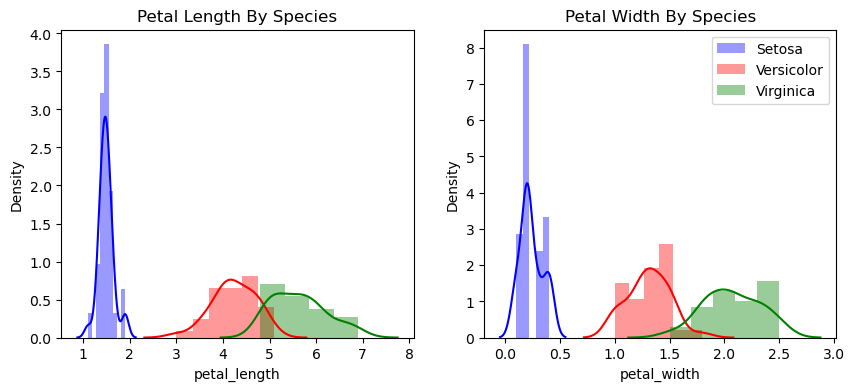

In [13]:
# We see that petal length/width can separate setosa from the others
# histogram by species
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);

ax1.set_title('Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2.set_title('Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);

plt.legend();

The .pairplot() function generates a Pairplot visualization, plotting the data points on a graph to find the relationship between them, either continuous or catagorical. Through this exploratory data visualization, we can identify the best set of features to form the most separated clusters in a Decision Tree model.

Let's look at classification patterns using bivariate analysis, an analysis of two variables for the relationship between them, using Pairplot. When the data set contains two or more variables and researchers aim to undertake comparisons between the two data set then bivariate analysis is a useful analysis technique. It involves exploring and describing the relationship between two variables and how they are associated with each other.  When we have 3 or more variables such as this dataset, bivariate analysis helps identify the variables that are most strongly related to each other and worthy of more rigorous investigation of the relationship between them.

And we see here that the Satosa species (blue) is clearly distinct from the other species. The Satosa species will therefore be the easiest species for the decision tree to predict.

The Virginica (green) and Versicolor (red) species have some overlap, especially where the sepal measurements are graphed. But how big of a challenge is the Decision Tree algorythm going to have to distingush these two species?  We can see that the petal measurements must be included in order to distinguish these two species.

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


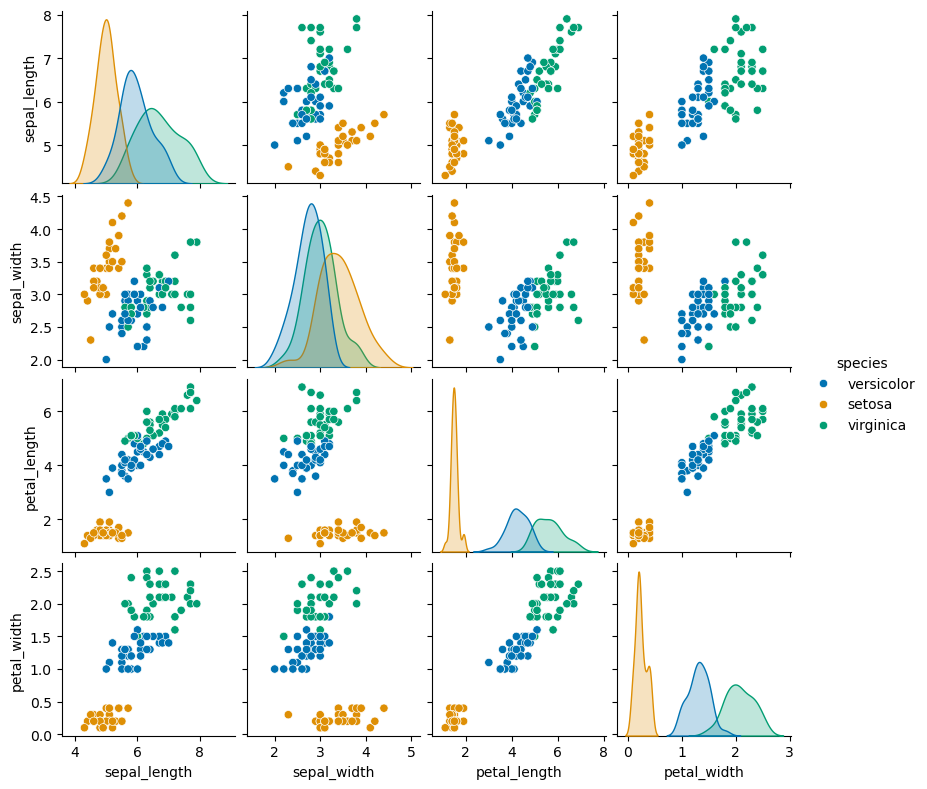

In [14]:
# bivariate relationship
# scatterplot matrix
train.info()
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

Correlation is also always a good place to look at to get some ideas about the relationships between data points in your data set (for example, dependence or association between features). What we are really looking for here is to find convincing information that the features are independent of each other because the accuracy of Machine Learning models is improved with independent data points. Highly correlated variables provide redundant information to the Decision Tree classifer.  

This bias towards independent data points is true for all classifiers.  Having multiple correlated predictor variables can decrease classifier model performance and interpretability (the ability for  humans to understand the results represented by the model).  We see below that the sepal length is highly correlated with the petal measurements.  The sepal length will therefore be contributing the most to any errors in the model's predictions.

Since we are interested in the accuracy of predicting the different classes of species, these pair plots below are far more revealing about feature relevance, where higher correlation (either positiive or negative) are likely to be more predictive, and class separability, where very low correlation may suggest that the classes are not easily separable based on the given features alone. **Please note** that we are simply checking our decision as to the combination of features chosen and that correlation does not necessarily imply causation.

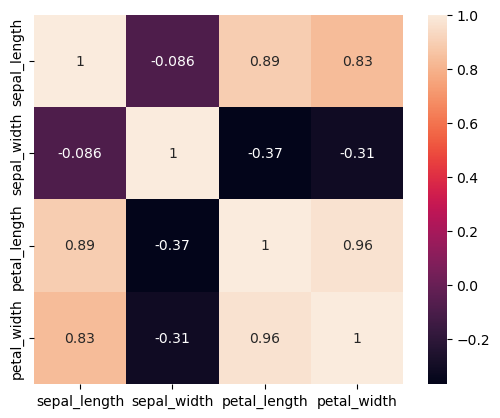

In [15]:
# correlation matrix
corrmat = train.corr(numeric_only=True)
sns.heatmap(corrmat, annot = True, square = True);

### Using a Decision Tree Classifier

Now that we have information on the structure of the data set, and its potential for error in a Decision Tree classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species
    
For the test data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species
    
Once these steps are complete, we can put the Decision Tree classifier to use!

In [16]:
# Model development - train
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species

# Model development - test
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

Decision Tree classifiers are functions in sklearn that we can use to set up a Decision Tree model.
Let's set up our first decision tree classifer with the training variables from above: X_train and y_train.
This decision tree will have a depth of 3 meaning 3 layers.

In [17]:
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Let's run the classifier on our test set to generate the predictions.  Sklearn classifiers have a built-in accuracy calculator that compares the predictions with the known true values from the test set y_test variable.

In [18]:
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(y_test, prediction)))

The accuracy of the Decision Tree is 0.933


93.3%  That's quite a small margin of error for predictions in our model! 

Let's look at the Decision Tree in more depth to see how it works.

In [19]:
mod_dt.feature_importances_

array([0.      , 0.      , 0.041423, 0.958577])

begin with plotting the Decision Tree

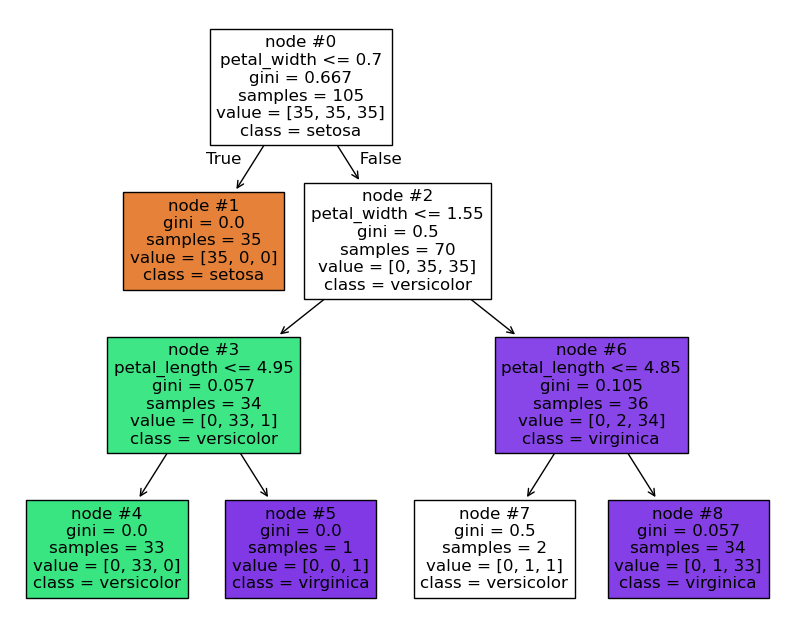

In [20]:
# set figure size
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True, label = 'all', node_ids = True);

## Understanding a Decision Tree 

### Root, Decision, and Leaf Nodes

<b> Root node (node #0):</b>  It represents data for Iris flowers represented in the training data set. There is also an important metric that the algorythm provides of the homogeneity (purity) of the data of the node : Gini index.  Gini is maximum (1 - heterogenous) when all classes are equally represented in the node.  It is minimum (0 or homogenous) when all instances in the node belong to the same class.

<b>Decision node (nodes #2, #3, #6):</b> The algorythm further splits the two sets of the sample of Iris flower data based on the features that deviate the most from the sample data sets. Decision trees rely on measures like Gini index to split nodes during training. The Decision node calculates the largest decrease in the heterogeneity compared to the Root node (the parent node). An large heterogeneity (higher Gini index) indicates how likely it is that there will be a misclassification of a randomly chosen iris flower.

<b>Leaf nodes (nodes #1, #4, #5, #7, #8):</b> They represent the final outcome of the algorythms' predictions of species class based on the relationship between data points. Common criteria at this level of the Decision Tree are the maximum tree depth (number of levels in a Decision Tree structure), minimum number of samples at a node, or no more deviations in the sample features or data point relationships.

Most data sets are messy, and have imperfect structures -- just like the real world phenomena they represent. In Notebook 3: Random Forest + Noisy data set, we will explore a messy dataset in the context of machine learning decision tree classifiers. 

**A node's value** attribute (on the right side of the = sign) tells you how many instances of each class this node applies to in the training set.  For example, the bottom right node (node#8) applies to 0 instances of Iris-Setosa class, 0 instances of Iris-Versicolor class and 26 instances of Iris-Virginica class.

**A node's gini index**: a node is "pure" (gini=0) if all instances it applies to in the training set belong to the same class. For example, since the depth 1 left node (node #1) applies only to the class of Iris-Setosa training instances, it is considered pure and its gini score is 0. It has no more splits in the tree. 

A better way to show how the feature space is partitioned into different regions is to draw a map of the data. Especially useful with small datasets, deciison boundary plots can help interpret and understand complex decision boundaries. The more intricate the partitions are of the boundaries, the less likely the model is to correctly predict a class.  We call this "overfitting" the data which is a common term heard in machine learning.  Because of it's visual appeal, it can make it easier to compare different classifiers such as Random Forest which we will see in notebook 2.

A decision boundary plot visually depicts the boundary or boundaries that a classifier used to separate classes in a multi-dimentional space. It's a useful tool for interpreting and evaluating classification models. The multicoloured surface separates two or more classes into different sets, all the points belonging to one class lie on one side of the decision boundary. These boundaries help assess if the model is appropriately generalizing the training data.  Smooth boundaries indicate better generalization. Unintuitive or irregular boundaries reveal areas of improvement to the model. For example, the blue area representing Virginica species, is divided into two which is unexpected.




The plot code below is divided into two sections:
* plot decision boundary for petal width vs petal length
    - This section of the code draws the shaded boundaries according to the species: red: setosa, yellow: versicolor, blue: virginica.
* plot test data points
    - This section of the code plots the points onto the shaded map just described.

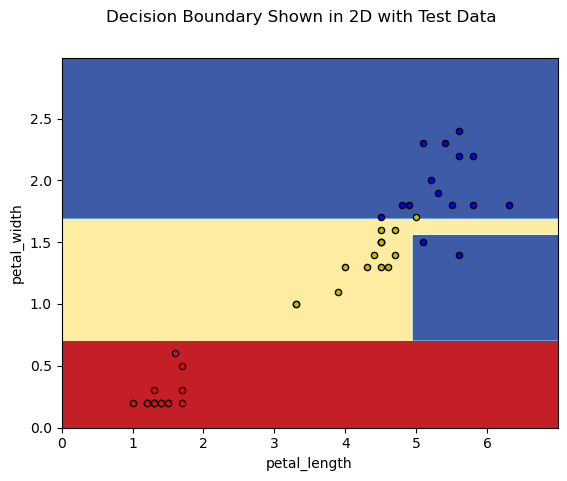

In [21]:
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

There are some points right on the boundary and that are the points that are challenging the Decision Tree and reduce the accuracy.  Because the dataset we are using is small, it is easy to see those points.  With larger datasets, there could be significant clusters on the boundary.  That's when it would be good to try Ramdom Forest.  Let's try that in our next Notebook 2.: Random Forest.

**Summary**<br>
In this interactive and narrative tutorial about Decision Tree classifiers, we combined code, visualizations, and explanations by using a well-known dataset like the Iris flower.<br>
In brief, we covered the following tasks:
- Imported the required libraries for the tutorial
- Loaded the iris dataset and explored and analyzed it using function like describe(), head(), etc.
- Split the dataset into training and test sets
- Created an instance of the decision tree classifier
- Trained the decision tree classifier on the training data
- Evaluated the trained model to make predictions on new data
- Visualized the learned decision tree in tree and decision boundary formats.  We interpreted them and discussed the tree's rules.

## Please proceed to Notebook 2: Random Forest